<a href="https://colab.research.google.com/github/dsanmartin/ELE050-B/blob/main/07_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Valores y vectores propios

\begin{equation}
  A\mathbf{v}=\lambda\mathbf{v}
\end{equation}

In [2]:
n = 100
A = np.random.rand(n, n)

In [3]:
vals, vecs = np.linalg.eigh(A)

La variable `vals` contiene los valores propios $\lambda_1, \dots, \lambda_n$ y `vecs` contiene los vectores propios $\mathbf{v}_1, \dots, \mathbf{v}_n$. Podemos reconstruir la matriz $A$ con

\begin{equation}
  A = V \Lambda V^{-1}, \quad
  \Lambda =
  \begin{pmatrix}
  \lambda_1 & 0 & \dots & 0 \\
  0 & \lambda_2 & \ddots & \vdots  \\
  \vdots & \ddots & \ddots & 0\\
  0 & \dots & 0 & \lambda_n
  \end{pmatrix}, \quad
  V =
  \begin{pmatrix}
  \mathbf{v}_1, \dots, \mathbf{v}_n
  \end{pmatrix}.
\end{equation}

La matriz $V$ es unitaria, por lo que

\begin{equation}
  V^{-1}V = VV^{-1}=I
\end{equation}

In [4]:
Id_mat = vecs @ np.linalg.inv(vecs)

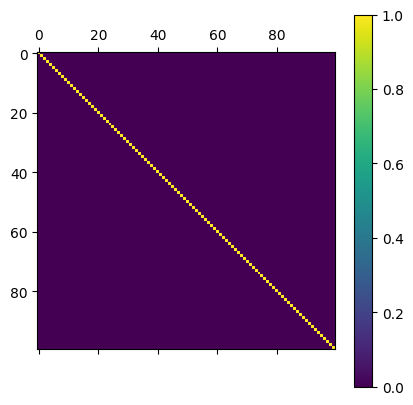

In [5]:
import matplotlib.pyplot as plt
plt.matshow(Id_mat)
plt.colorbar()
plt.show()

In [6]:
Lamb = np.zeros((n, n)) # Creación de \Lambda
for i in range(n):
    Lamb[i, i] = vals[i]

In [7]:
A_rec = vecs @ Lamb @ np.linalg.inv(vecs)

In [8]:
# Mostrar las primeas 5 filas
for i in range(5):
  print(i)
  # Mostrar los primeros 4 elementos
  print(A[i,:4])
  print(A_rec[i,:4])

0
[0.7752671  0.66703589 0.43275462 0.72889454]
[0.7752671  0.68575157 0.92473173 0.65456418]
1
[0.68575157 0.77485624 0.27513728 0.94235375]
[0.68575157 0.77485624 0.69709513 0.89826674]
2
[0.92473173 0.69709513 0.9185379  0.98878451]
[0.92473173 0.69709513 0.9185379  0.63645667]
3
[0.65456418 0.89826674 0.63645667 0.04965935]
[0.65456418 0.89826674 0.63645667 0.04965935]
4
[0.97619859 0.85149786 0.73573008 0.97184928]
[0.97619859 0.85149786 0.73573008 0.97184928]


## PCA from scratch

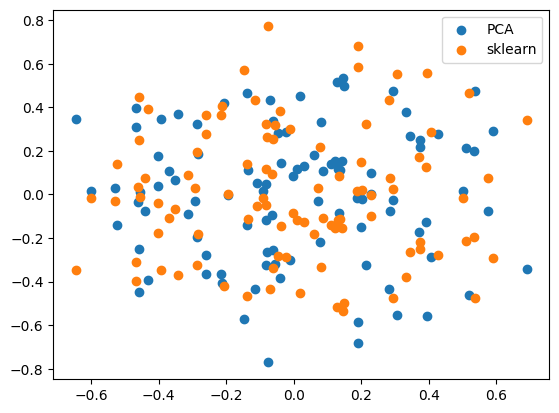

In [9]:
n, m = 100, 5
p = 2 # p componentes principales
X = np.random.rand(n, m) # Matriz aleatoria
X_c = X - np.mean(X, axis=0) # np.mean calcula el promedio y genera un vector, pero al restarlo a una matriz utiliza "broadcasting" (https://numpy.org/doc/stable/user/basics.broadcasting.html)
Sigma = X_c.T @ X_c / X.shape[0] # Matriz de covarianza
svals, svecs = np.linalg.eigh(Sigma) # Calcular valores y vectores propios. Se retornan en orden ascendente
svecs = svecs[:,::-1] # Invertimos para que queden de forma ascedente
Z = X_c @ svecs[:,:p] # Proyectamos los datos en los p primeros componentes
Z_pca = PCA(n_components=2).fit_transform(X_c) # Para comparar con scikit-learn
plt.scatter(Z[:, 0], Z[:, 1], label='PCA')
plt.scatter(Z_pca[:, 0], Z_pca[:, 1], label='sklearn')
plt.legend()
plt.show()

A veces los resultados pueden ser distintos, ejecutelo varias veces para mirar. Al generar $A$ de forma aleatoria puede generar matrices mal condicionadas,  por lo tanto el cálculo de valores y vectores propios pueden ser impreciso.

# Reducción de dimensionalidad

In [10]:
data = load_digits()

In [11]:
X = data.data

In [12]:
X[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

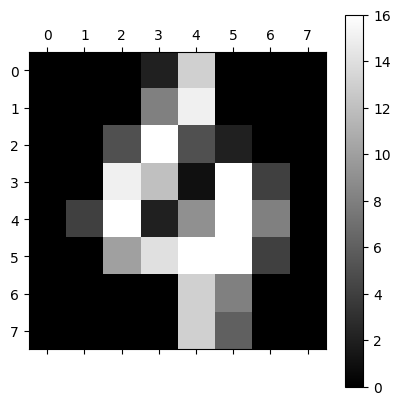

In [13]:
plt.matshow(X[100].reshape(8, 8), cmap='gray')
plt.colorbar()
plt.show()

In [14]:
X_scaled = StandardScaler().fit_transform(X)

In [15]:
data_pca = PCA(n_components=2).fit_transform(X_scaled)

In [16]:
data_tsne = TSNE(n_components=2).fit_transform(X_scaled)

In [17]:
ae = MLPRegressor(hidden_layer_sizes=(2, ), max_iter=1000).fit(X_scaled, X_scaled)

In [18]:
W = ae.coefs_[0]
b = ae.intercepts_[0]

In [19]:
data_ae = np.maximum(0, X_scaled @ W + b) # Emulamos el codificador

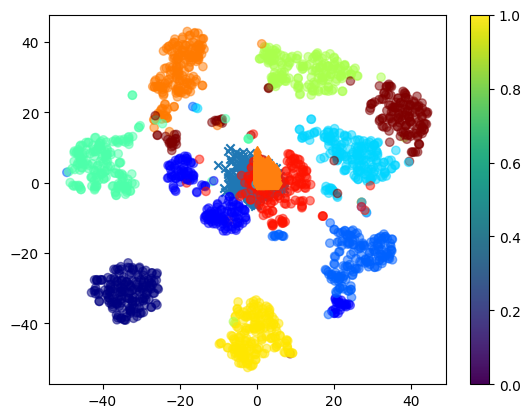

In [20]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], marker="x")
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data.target, cmap="jet", alpha=.5)
plt.scatter(data_ae[:, 0], data_ae[:, 1], marker='d')
plt.colorbar()
plt.show()

In [21]:
data.target.shape

(1797,)

## Solo para jugar...

In [22]:
data_pca_2 = PCA(n_components=25).fit_transform(X_scaled)
data_tsne_2 = TSNE(n_components=25, method='exact').fit_transform(X_scaled)

7


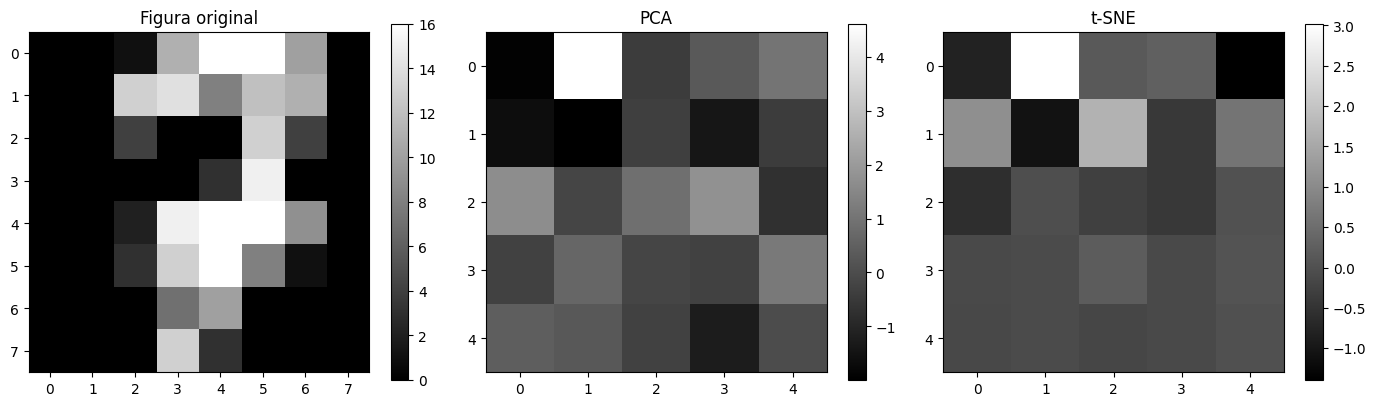

In [23]:
n = 300
print(data.target[n])
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.imshow(X[n].reshape(8, 8), cmap="gray")
plt.title("Figura original")
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("PCA")
plt.imshow(data_pca_2[n].reshape(5, 5), cmap='gray')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("t-SNE")
plt.imshow(data_tsne_2[n].reshape(5, 5), cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()